In [9]:
%load_ext autoreload
%autoreload 1

import os
import random
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
import torchvision.transforms as T



%aimport DataScienceBowl
from DataScienceBowl import DataScienceBowl


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
# Set device to GPU if available
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('using cuda')
else:
    torch.device('cpu')
    print('using cpu')
    
# Set seeds
seed = 42
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

using cuda


In [12]:
# Define Transforms
# TODO Separate Train and Test transforms
transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
#     T.ToTensor()
#     T.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])

In [13]:
dataset = DataScienceBowl('data/data_science_train', transform=transform)

dataLoader = DataLoader(dataset, batch_size=1, shuffle=True)

227


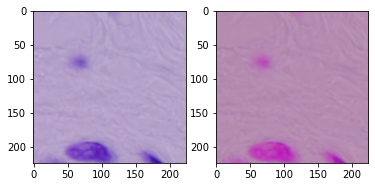

In [101]:
i = int(random.random() * 670)
print(i)
img = dataset[4]['image']/255
trnsf = T.Compose([
    T.ColorJitter(0.4, 0.4, 0.4, 0.3)
])

img_hat = trnsf(img)


f,a = plt.subplots(1,2)
a[0].imshow(img.permute(1,2,0))
a[1].imshow(img_hat.permute(1,2,0))

In [59]:

img, img_hat

(tensor([[[0.0157, 0.0118, 0.0118,  ..., 0.0275, 0.0275, 0.0275],
          [0.0118, 0.0118, 0.0118,  ..., 0.0235, 0.0275, 0.0275],
          [0.0118, 0.0118, 0.0118,  ..., 0.0235, 0.0235, 0.0275],
          ...,
          [0.0118, 0.0118, 0.0118,  ..., 0.0078, 0.0078, 0.0078],
          [0.0118, 0.0118, 0.0118,  ..., 0.0078, 0.0078, 0.0078],
          [0.0118, 0.0157, 0.0118,  ..., 0.0078, 0.0078, 0.0078]],
 
         [[0.0157, 0.0118, 0.0118,  ..., 0.0275, 0.0275, 0.0275],
          [0.0118, 0.0118, 0.0118,  ..., 0.0235, 0.0275, 0.0275],
          [0.0118, 0.0118, 0.0118,  ..., 0.0235, 0.0235, 0.0275],
          ...,
          [0.0118, 0.0118, 0.0118,  ..., 0.0078, 0.0078, 0.0078],
          [0.0118, 0.0118, 0.0118,  ..., 0.0078, 0.0078, 0.0078],
          [0.0118, 0.0157, 0.0118,  ..., 0.0078, 0.0078, 0.0078]],
 
         [[0.0157, 0.0118, 0.0118,  ..., 0.0275, 0.0275, 0.0275],
          [0.0118, 0.0118, 0.0118,  ..., 0.0235, 0.0275, 0.0275],
          [0.0118, 0.0118, 0.0118,  ...,

In [60]:
torch.unique(img_hat)

tensor([0.0069, 0.0090, 0.0110, 0.0131, 0.0152, 0.0173, 0.0193, 0.0214, 0.0235,
        0.0256, 0.0276, 0.0297, 0.0318, 0.0339, 0.0359, 0.0380, 0.0401, 0.0421,
        0.0442, 0.0463, 0.0484, 0.0504, 0.0525, 0.0546, 0.0567, 0.0587, 0.0608,
        0.0629, 0.0650, 0.0670, 0.0691, 0.0712, 0.0733, 0.0753, 0.0774, 0.0795,
        0.0815, 0.0836, 0.0857, 0.0878, 0.0898, 0.0919, 0.0940, 0.0961, 0.0981,
        0.1002, 0.1023, 0.1044, 0.1064, 0.1085, 0.1106, 0.1127, 0.1147, 0.1168,
        0.1189, 0.1209, 0.1230, 0.1251, 0.1272, 0.1292, 0.1313, 0.1334, 0.1355,
        0.1375, 0.1396, 0.1417, 0.1438, 0.1458, 0.1479, 0.1500, 0.1521, 0.1541,
        0.1562, 0.1583, 0.1603, 0.1624, 0.1645, 0.1666, 0.1686, 0.1707, 0.1728,
        0.1749, 0.1769, 0.1790, 0.1811, 0.1832, 0.1852, 0.1873, 0.1894, 0.1915,
        0.1935, 0.1956, 0.1977, 0.1997, 0.2018, 0.2039, 0.2060, 0.2080, 0.2101,
        0.2122, 0.2143, 0.2163, 0.2184, 0.2205, 0.2246, 0.2267, 0.2288])